<a href="https://colab.research.google.com/github/nurajannat11/simulation-and-modelling/blob/main/Ruba_ques_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd

data = {'Customer_ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
        'Daily_Arrivals': [8, 12, 10, 15, 9, 13, 11, 14, 7, 16, 10, 12, 9, 15, 11, 13, 14, 8, 12, 10]}
df = pd.DataFrame(data)

display(df)

,Customer_ID,Daily_Arrivals
0,1,8
1,2,12
2,3,10
3,4,15
4,5,9
5,6,13
6,7,11
7,8,14
8,9,7
9,10,16


In [8]:
import numpy as np

mean_arrivals = df['Daily_Arrivals'].mean()
population_variance = df['Daily_Arrivals'].var(ddof=0) # Use ddof=0 for population variance
sample_variance = df['Daily_Arrivals'].var(ddof=1)   # Use ddof=1 for sample variance
standard_deviation = df['Daily_Arrivals'].std()

print(f"Mean Daily Arrivals: {mean_arrivals:.2f}")
print(f"Population Variance: {population_variance:.2f}")
print(f"Sample Variance: {sample_variance:.2f}")
print(f"Standard Deviation: {standard_deviation:.2f}")

Mean Daily Arrivals: 11.45
Population Variance: 6.35
Sample Variance: 6.68
Standard Deviation: 2.58


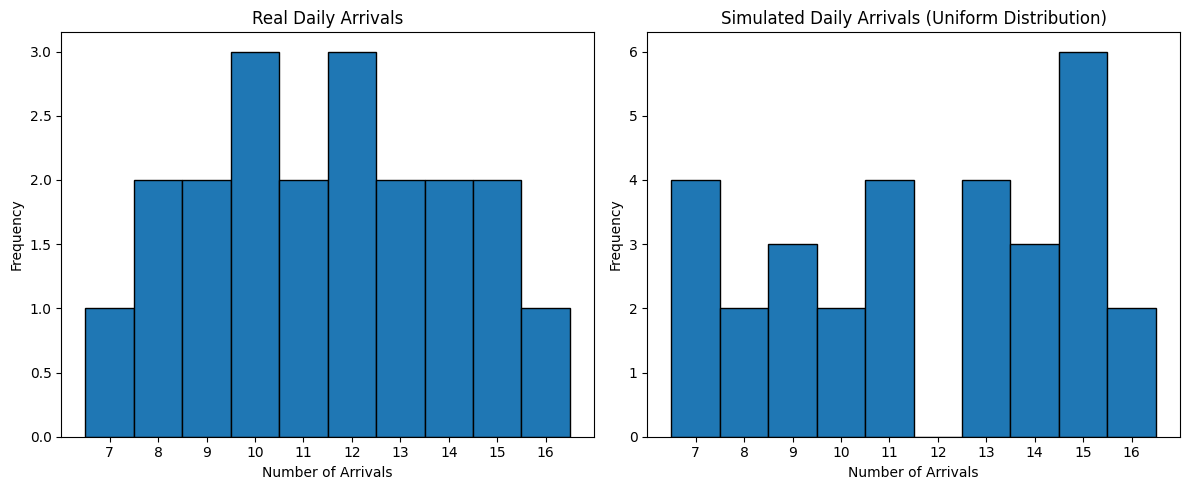

In [9]:
import matplotlib.pyplot as plt

# Define the range for the uniform distribution based on the observed data
min_arrivals = df['Daily_Arrivals'].min()
max_arrivals = df['Daily_Arrivals'].max()

# Generate simulated data for 30 days from a uniform distribution
num_simulated_days = 30
simulated_arrivals = np.random.uniform(low=min_arrivals, high=max_arrivals, size=num_simulated_days)

# Create a new DataFrame for the simulated data
simulated_df = pd.DataFrame({'Daily_Arrivals': simulated_arrivals})


# Plotting side-by-side histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for real data
axes[0].hist(df['Daily_Arrivals'], bins=np.arange(min_arrivals, max_arrivals + 2) - 0.5, edgecolor='black')
axes[0].set_title('Real Daily Arrivals')
axes[0].set_xlabel('Number of Arrivals')
axes[0].set_ylabel('Frequency')
axes[0].set_xticks(np.arange(min_arrivals, max_arrivals + 1))


# Histogram for simulated data
axes[1].hist(simulated_df['Daily_Arrivals'], bins=np.arange(min_arrivals, max_arrivals + 2) - 0.5, edgecolor='black')
axes[1].set_title('Simulated Daily Arrivals (Uniform Distribution)')
axes[1].set_xlabel('Number of Arrivals')
axes[1].set_ylabel('Frequency')
axes[1].set_xticks(np.arange(min_arrivals, max_arrivals + 1))


plt.tight_layout()
plt.show()

In [10]:
# Monte Carlo Simulation
num_simulations = 100000
simulated_arrivals_mc = np.random.uniform(low=min_arrivals, high=max_arrivals, size=num_simulations)

# Count how many times the simulated arrivals are greater than 15
arrivals_greater_than_15 = (simulated_arrivals_mc > 15).sum()

# Estimate the probability
probability_greater_than_15 = arrivals_greater_than_15 / num_simulations

print(f"Estimated probability of more than 15 arrivals: {probability_greater_than_15:.4f}")

Estimated probability of more than 15 arrivals: 0.1120


Hypothesized Mean: 15
T-statistic: -6.1419
P-value: 0.0000
Conclusion: Reject the null hypothesis: The mean daily customer arrival is significantly different from the hypothesized mean.


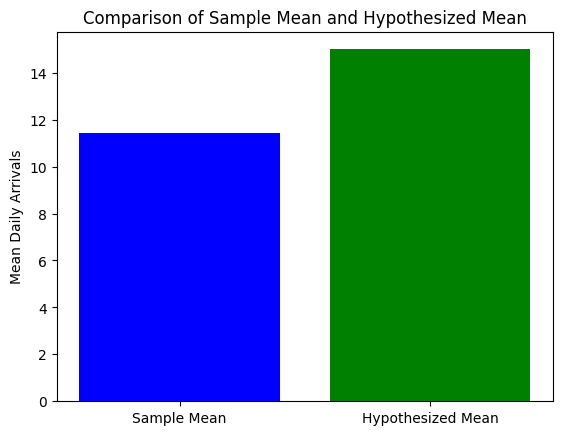


Interpretation:
Based on the t-test results and visualization, we can interpret the findings in the context of daily customer arrivals...


In [14]:
from scipy import stats
import matplotlib.pyplot as plt

# Calculate the hypothesized mean using the student ID 105
student_id = 105
hypothesized_mean = (student_id % 10) + 10
print(f"Hypothesized Mean: {hypothesized_mean}")

# Perform a one-sample t-test
t_statistic, p_value = stats.ttest_1samp(df['Daily_Arrivals'], hypothesized_mean)

print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Determine the conclusion based on the p-value (using alpha = 0.05)
alpha = 0.05
if p_value < alpha:
    conclusion = "Reject the null hypothesis: The mean daily customer arrival is significantly different from the hypothesized mean."
else:
    conclusion = "Fail to reject the null hypothesis: There is not enough evidence to conclude that the mean daily customer arrival is significantly different from the hypothesized mean."

print(f"Conclusion: {conclusion}")

# Visualize the sample mean and hypothesized mean
means = [mean_arrivals, hypothesized_mean]
labels = ['Sample Mean', 'Hypothesized Mean']

plt.bar(labels, means, color=['blue', 'green'])
plt.ylabel('Mean Daily Arrivals')
plt.title('Comparison of Sample Mean and Hypothesized Mean')
plt.show()

# Interpretation (Placeholder - you will need to provide your unique interpretation here)
print("\nInterpretation:")
print("Based on the t-test results and visualization, we can interpret the findings in the context of daily customer arrivals...")